In [224]:
import pandas as pd
import seaborn as sns
import pmdarima
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima.utils import ndiffs
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 


In [202]:
#H0 the value is stationary (if p<0.05 then this is accepted)
#H1 The value is not stationary (if p>0.05 then this is accepted)

def stationary_check(close):
    result=adfuller(close,autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [203]:
def acf_plotter(data):
    plot_acf(data)
    plt.show()

In [204]:
def pcaf_plotter(data):
    plot_pacf(data)
    plt.show()

In [205]:
df=pd.read_csv('003.csv')
df_new=df[['Close']]
df_new

,Close
0,132.000000
1,127.250000
2,122.250000
3,120.500000
4,123.750000
...,...
2995,240.300003
2996,251.800003
2997,249.300003
2998,240.000000


Estimating the difference parameter using the pmdarima library

In [206]:
stationary_check(df_new['Close'])

ADF Test Statistic : -1.3926250296172322
p-value : 0.5858066204937209
#Lags Used : 1
Number of Observations Used : 2998
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [207]:
ndiffs(df_new['Close'],test='adf')

1

In [208]:
df_new['Subtracted']=df_new['Close']-df_new['Close'].shift(1)
df_new

,Close,Subtracted
0,132.000000,NaN
1,127.250000,-4.750000
2,122.250000,-5.000000
3,120.500000,-1.750000
4,123.750000,3.250000
...,...,...
2995,240.300003,-0.899994
2996,251.800003,11.500000
2997,249.300003,-2.500000
2998,240.000000,-9.300003


In [210]:
stationary_check(df_new['Subtracted'].dropna())

ADF Test Statistic : -57.90839225195863
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2998
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


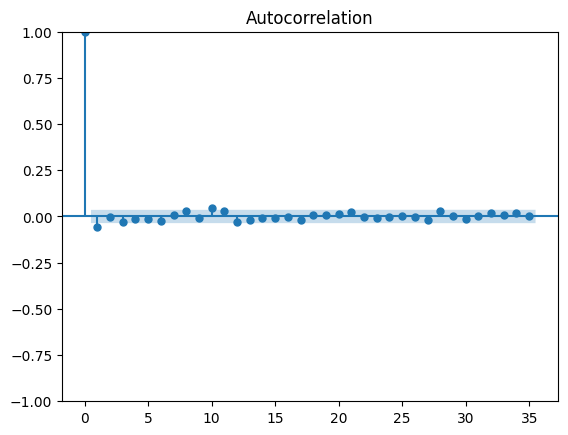

In [211]:
# acf_plotter(df_new['Subtracted'])
df_new.dropna(inplace=True)
# df_new
acf_plotter(df_new['Subtracted'])


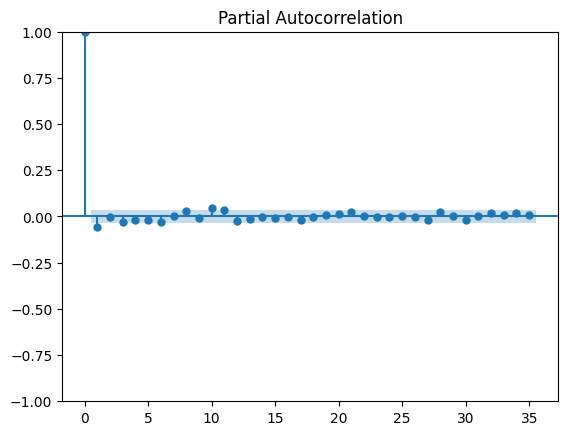

In [ ]:
pcaf_plotter(df_new['Subtracted'])

Estimating the P and Q parameter using the BIC value 

In [ ]:
# import itertools
# p_values = range(0, 6)  # Example range for p values
# q_values = range(0, 6)  # Example range for q values

# # Create combinations of p and q values
# pq_values = list(itertools.product(p_values, q_values))
# import statsmodels.api as sm

# best_bic = float('inf')  # Initialize with a large value
# best_p, best_q = 0, 0

# for p, q in pq_values:
#     try:
#         model = sm.tsa.ARIMA(df['Subtracted'], order=(p, 0, q))
#         results = model.fit()
#         bic = results.bic

#         if bic < best_bic:
#             best_bic = bic
#             best_p, best_q = p, q

#     except:
#         continue

# print('The best value for p parameter is: ',best_p)
# print('The best value for q parameter is: ',best_q)

splitting the data into test and train

In [ ]:
#No need

Fitting the model using parameters p=1,d=1,q=1

In [ ]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(df_new['Close'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16369.765, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16375.724, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16367.462, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16367.365, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16373.967, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16367.805, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16369.295, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16369.024, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16365.646, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16366.136, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16367.580, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16365.740, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16367.356, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.917 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2999
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -8180.823
Date:                Wed, 01 Nov 2023   AIC                          16365.646
Time:                        23:57:20   BIC                          16377.658
Sample:                             0   HQIC                         16369.967
                               - 2999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0591      0.013     -4.589      0.000      -0.084      -0.034
sigma2        13.7306      0.169     81.080      0.000      13.399      14.063
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6005.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [235]:
# arr=df_new['Close'][:100]
# arr
train_data=list(df_new['Close'][:2500])
# print(type(train_data))
for i in range(498):
    model=ARIMA(train_data,order=(1,1,1))
    model_fit=model.fit()
    point=model_fit.predict(start=len(train_data)+1,end=len(train_data)+2,dynamic=True)
    # print(type(point))
    # point=np.array(point)
    # print(type(point))
    train_data.append(point[0])


print(train_data)

[127.25, 122.25, 120.5, 123.75, 118.0, 116.75, 120.0, 116.0, 119.0, 117.75, 116.75, 119.0, 117.75, 119.25, 117.75, 120.0, 120.0, 122.0, 123.0, 123.75, 127.75, 127.75, 126.0, 123.0, 123.0, 124.25, 131.25, 135.5, 135.5, 134.25, 133.5, 132.5, 132.0, 132.25, 128.25, 127.0, 133.25, 134.75, 141.0, 132.0, 127.0, 126.75, 133.25, 128.25, 128.5, 128.5, 133.25, 137.0, 135.5, 133.5, 130.5, 132.75, 132.5, 136.0, 136.0, 136.25, 138.25, 139.5, 139.0, 135.25, 137.5, 136.5, 140.5, 139.5, 140.5, 137.25, 146.25, 144.0, 139.75, 143.0, 145.25, 143.5, 140.0, 135.0, 136.5, 140.5, 141.0, 141.75, 139.25, 140.0, 138.0, 142.75, 130.0, 130.0, 127.75, 123.25, 124.5, 123.75, 121.5, 121.5, 119.5, 124.75, 125.5, 125.0, 124.0, 124.0, 125.25, 123.25, 121.0, 123.75, 127.5, 128.75, 128.25, 128.75, 123.75, 124.25, 124.0, 122.0, 122.25, 122.0, 124.0, 124.25, 123.0, 122.0, 125.0, 122.75, 120.0, 119.75, 118.5, 116.5, 121.25, 121.0, 122.0, 123.75, 125.25, 128.75, 124.5, 125.0, 124.75, 124.5, 124.0, 115.0, 113.5, 115.25, 114.5

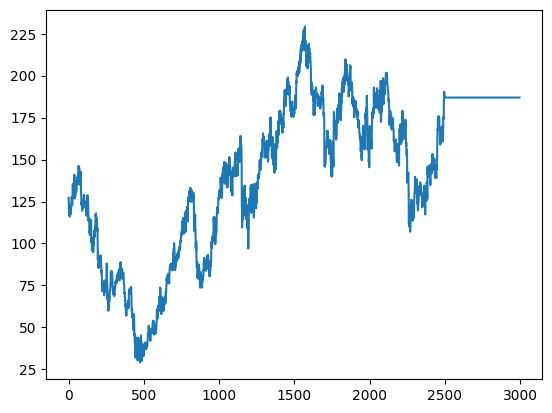

In [236]:
x=[]
for i in range(len(train_data)):
    x.append(i)

plt.plot(x,train_data)
plt.show()

In [214]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2500
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6644.953
Date:                Thu, 02 Nov 2023   AIC                          13293.906
Time:                        00:00:40   BIC                          13305.553
Sample:                             0   HQIC                         13298.135
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0566      0.017     -3.403      0.001      -0.089      -0.024
sigma2        11.9438      0.169     70.835      0.000      11.613      12.274
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3869.56
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2103    190.281452
2104    190.281452
2105    190.281452
2106    190.281452
2107    190.281452
           ...    
2994    190.281452
2995    190.281452
2996    190.281452
2997    190.281452
2998    190.281452
Name: predicted_mean, Length: 896, dtype: float64


<Axes: >

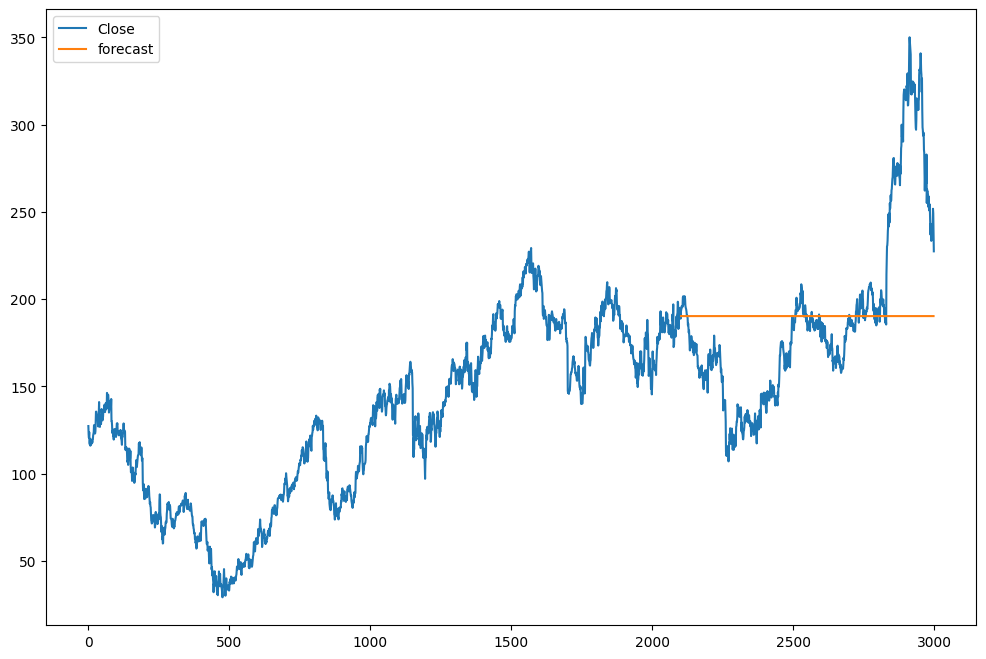

In [212]:
pred=model_fit.predict(start=2103,end=2998,dynamic=False)
print(pred)
df_new['forecast']=pred
df_new[['Close','forecast']].plot(figsize=(12,8))